# Bank Marketing Analytics of Client Subscription

# Part 1 - DEFINE

### 1. Define the problem

This Jupyter Notebook loads, explores, and visualizes the Bank Marketing datasets. Also, builds and tests several predictive models, and then predict if client will subscribe a term deposit on test data using the best model.

In [1]:
# Current workspace
!pwd

/Users/suroor/Desktop/Springboard/Bank-Marketing-Client-Subscription-


In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.utils import shuffle

% matplotlib inline

## Part 2 - DISCOVER

###  2. Load the data and Examine the data

In [3]:
#Load csv file to pd dataframe
bank_data = pd.read_csv("bank-additional-full.csv",sep=';')

#### <font color=green>*Examine the data*</font>

In [4]:
# Columns information
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
# print first five rows of bank_data
bank_data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# display total number of rows and columns
bank_data.shape

(41188, 21)

In [7]:
# know bak_data information 
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [8]:
# Describe numeric bank_data
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# check the occurrence of each job in bank_data
bank_data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

### 3. Clean the data

#### *Check for Duplicates*

In [10]:
bank_data.duplicated().sum()

12

#### <font color=green>*Check invalid or corrupt data and remove it*</font>

In [11]:
'''remove duplicated rows'''
def clean_data(data):
    clean_data = data.drop_duplicates()
    return clean_data

In [12]:
'''Shuffle improves cross-validation accuracy'''
clean_bank_data = shuffle(clean_data(bank_data))
clean_bank_data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5651,35,student,single,high.school,no,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11652,58,retired,married,professional.course,unknown,no,no,telephone,jun,fri,...,5,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
34160,38,self-employed,married,basic.9y,no,yes,no,cellular,may,wed,...,2,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no
31180,39,technician,divorced,professional.course,no,yes,no,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,yes
29878,50,admin.,married,high.school,no,yes,no,cellular,apr,mon,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no


In [13]:
clean_bank_data.shape

(41176, 21)

In [14]:
clean_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 5651 to 36573
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(5), int64(5), object(11)
memory 

### 4. Explore the data (EDA)

In [37]:
'''Divide varibles in categorical and numerical'''
categorical_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
numeric_vars = ['age', 'duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
target_var = ['y']

In [34]:
# know target variable data
clean_bank_data['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

#### *Summarize numeric variable*

In [16]:
clean_bank_data.describe(include=[np.number])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### *summarize categorical variable*

In [17]:
clean_bank_data.describe(include = ['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


#### *Find Correction of variables*

In [18]:
def get_correlation(data):
    return data.corr()

corr_data = get_correlation(clean_bank_data)
corr_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


### 5. Data Visualization

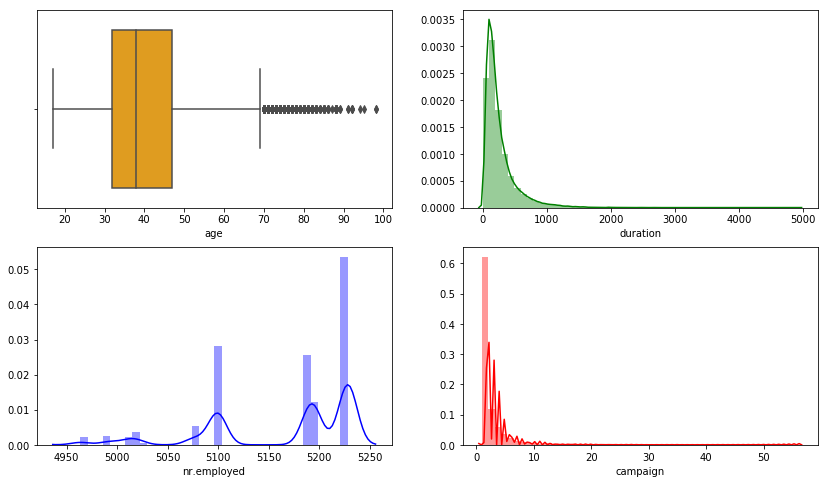

In [25]:
plt.figure(figsize = (14, 8))
plt.subplot(2,2,1)
sns.boxplot(clean_bank_data.age, color='Orange')
plt.subplot(2,2,2)
sns.distplot(clean_bank_data.duration, color='green')
plt.subplot(2,2,3)
sns.distplot(clean_bank_data['nr.employed'], color='blue')
plt.subplot(2,2,4)
sns.distplot(clean_bank_data.campaign, color='red')
plt.show()

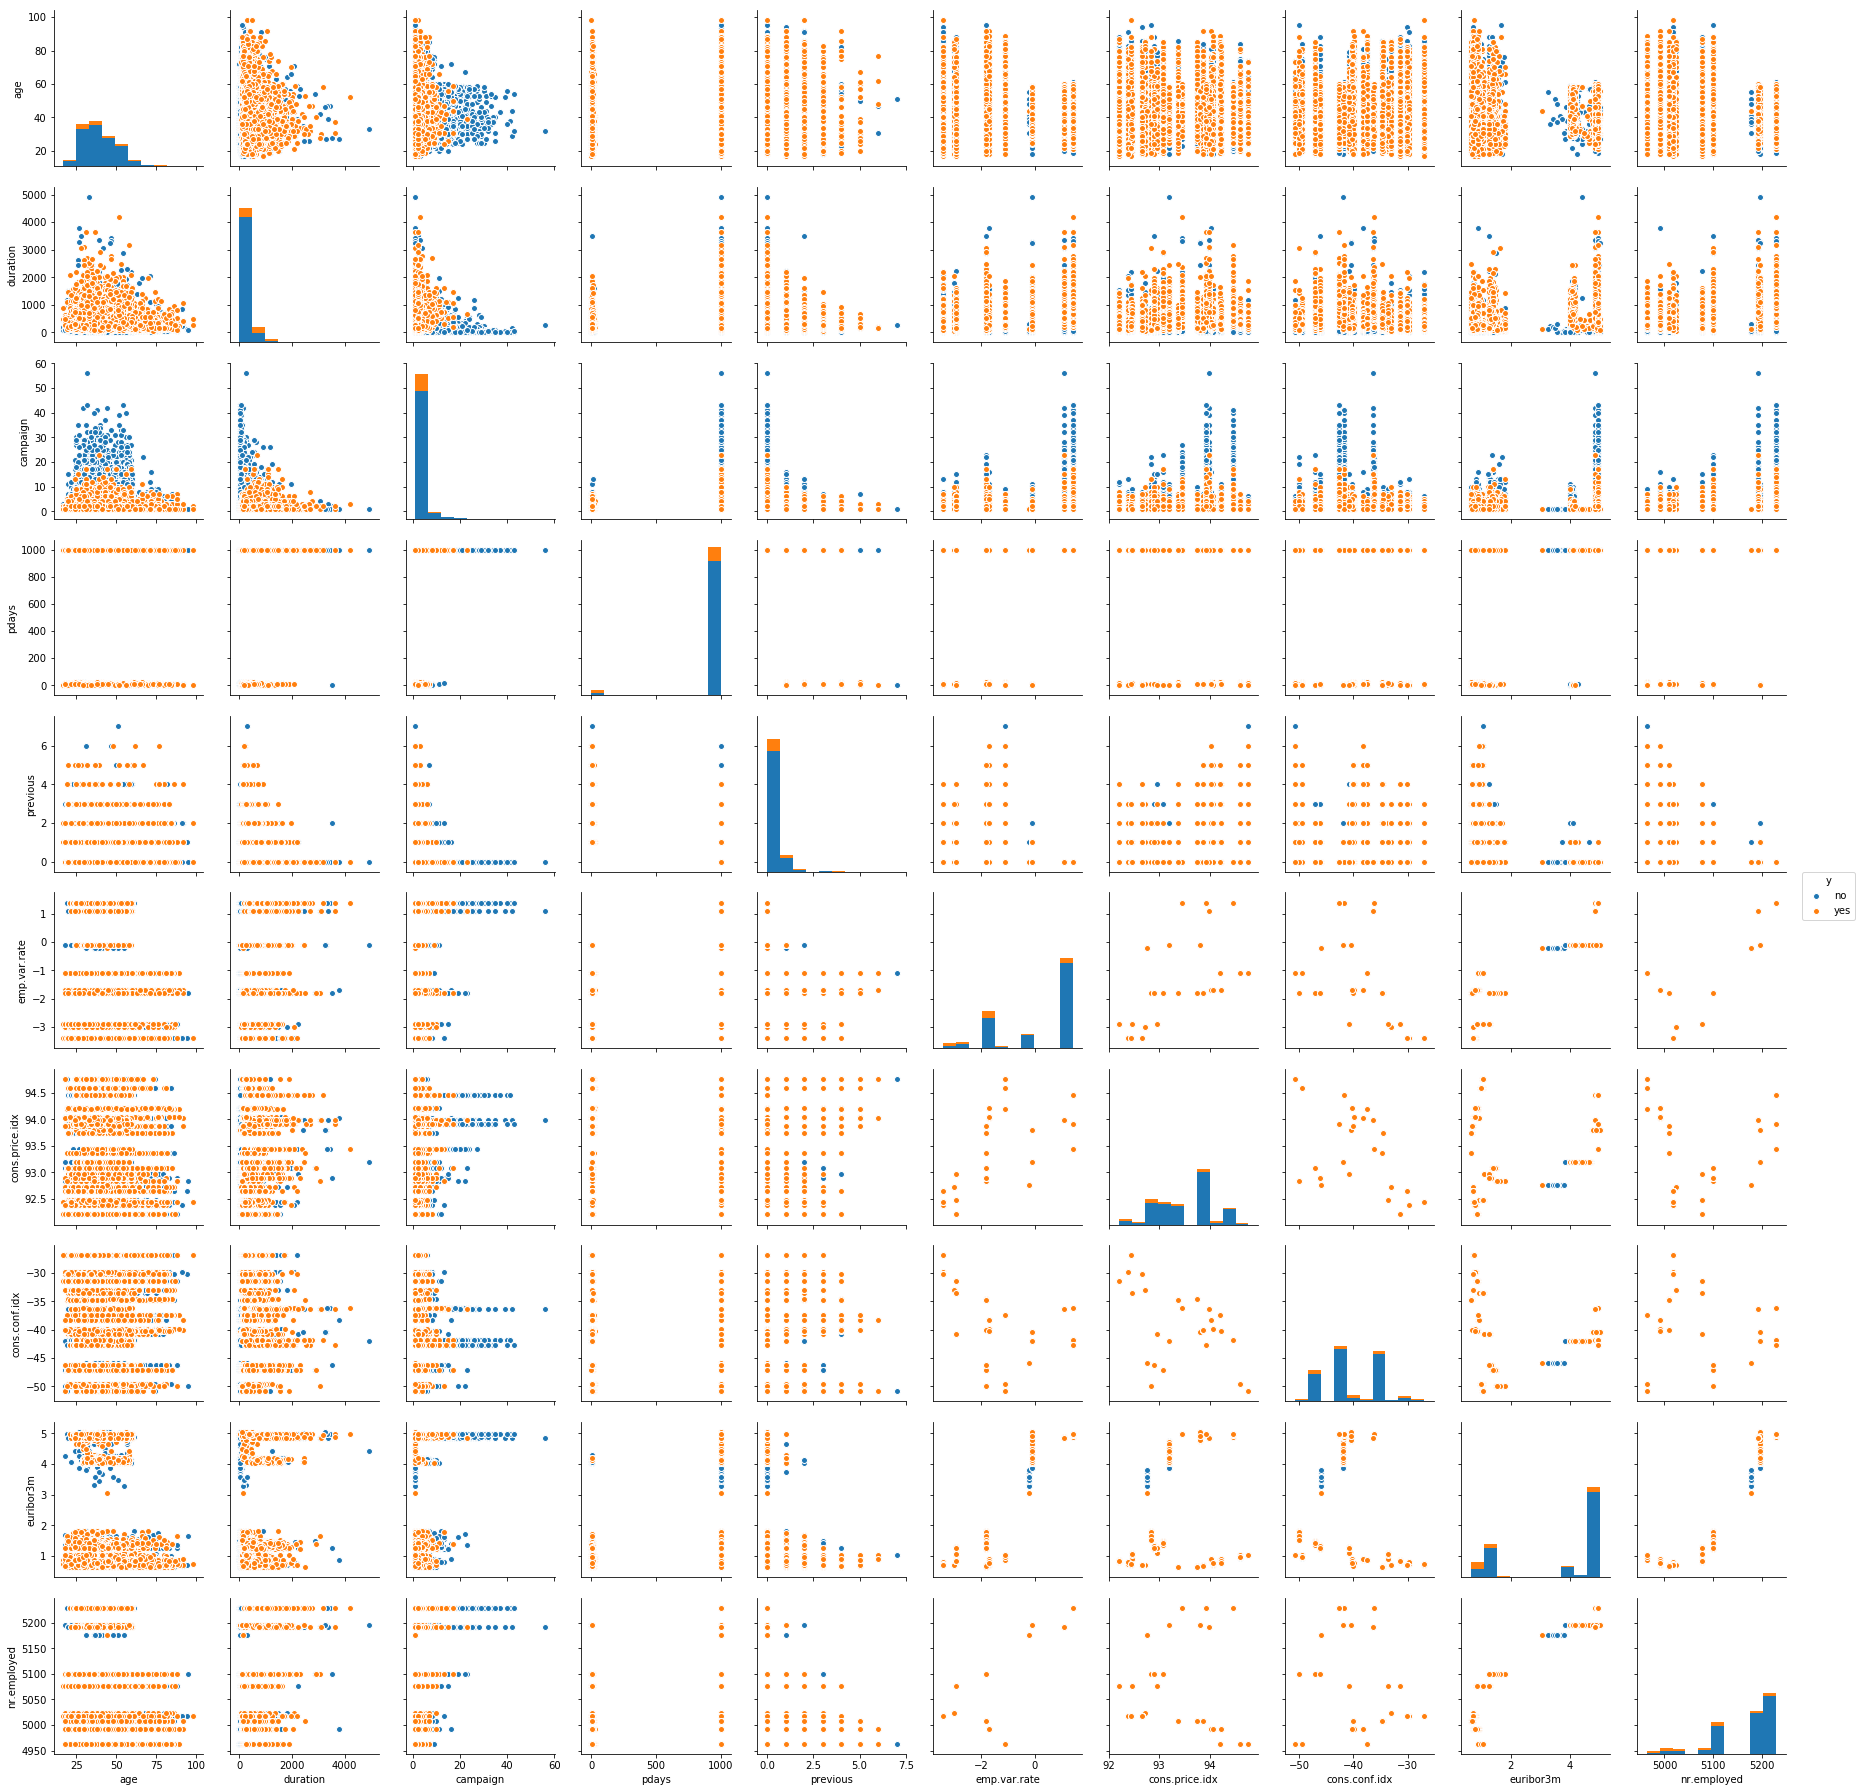

In [20]:
sns.pairplot(clean_bank_data, hue='y')
